# Lead Scoring Case Study

## Problem Statement
X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

# Business Goal
Basically the company wants you to:
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

# Step 1: Reading and Understanding the Data

Let us first import important libraries and read the Bike Sharing dataset

In [711]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [712]:
# importing important libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [713]:
leadScore = pd.read_csv('Leads.csv')

# checking the head of the data set

leadScore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [714]:
leadScore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [715]:
leadScore.shape

(9240, 37)

In [716]:
leadScore.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [717]:
leadScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 2: Data Cleaning

In [718]:
# Checking for any duplicate values

leadScore_Copy = leadScore.copy()

leadScore_Copy.shape

(9240, 37)

In [719]:
leadScore_Copy.drop_duplicates(inplace=True)

leadScore_Copy.shape

(9240, 37)

As there is no change in shape of the data set after `drop_duplicates`, it means that there are no duplicate values in the original data set

In [720]:
# Checking for percentage of the null values if there are any

leadMissing = round(100*(leadScore.isnull().sum()/len(leadScore.index)),2)

leadMissing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As we have noticed in the data set, these following columns have an input named `Selected`:
- `Specialization`
- `How did you hear about X Education`
- `Lead Profile`
- `City`

The `Selected` input is counted as a value meanwhile it should be counted as a missing value and it may hindering the analysis so we are going to replace it with `NaN`

In [721]:
leadScore['Specialization'] = leadScore['Specialization'].replace('Select', np.nan)
leadScore['How did you hear about X Education'] = leadScore['How did you hear about X Education'].replace('Select', np.nan)
leadScore['Lead Profile'] = leadScore['Lead Profile'].replace('Select', np.nan)
leadScore['City'] = leadScore['City'].replace('Select', np.nan)

In [722]:
# Again checking for the null values

leadMissing = round(100*(leadScore.isnull().sum()/len(leadScore.index)),2)

leadMissing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We can notice that there are high percentages of null values in many columns, so we are going to drop all the columns that have 35% or more null values and column `ProspectID` and `Leada Number` since they both have unique values.

In [723]:
leadScore = leadScore.drop(['Prospect ID', 'Lead Number', 'Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [724]:
# Again checking the missing values 
leadMissing = round(100*(leadScore.isnull().sum()/len(leadScore.index)),2)

leadMissing

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

As we can observe that we still have some columns with missing values 

- We need to check these columns to see what values do they have
- Then we can go ahead with imputing values or just drop the whole column

In [725]:
leadScore.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

Now let's check the median of values for `TotalVisits` columns

In [726]:
leadScore.TotalVisits.median()

3.0

So as we know, we need to swap the missing values with the median value `3`

In [727]:
leadScore['TotalVisits'] = leadScore['TotalVisits'].replace(np.nan, leadScore['TotalVisits'].median())

In [728]:
leadScore['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We can notice that `Google` has appeared twice with different phrase `google`, so we need to change to only one form

Also, the majority of values are `Google` so we are going to impute the other missing values as `Google` and combining the low frequency variables to `Others`.

In [729]:
leadScore['Lead Source'] = leadScore['Lead Source'].replace('google', 'Google')
leadScore['Lead Source'] = leadScore['Lead Source'].replace(np.nan, 'Google')

In [730]:
leadScore['Lead Source'] = leadScore['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM','Live Chat'],'Others')

In [731]:
leadScore['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

Let's check for the median value of `Page Views Per Visit`

In [732]:
leadScore['Page Views Per Visit'].median()

2.0

We are going to swap the missing values with median value `2.0`

In [733]:
leadScore['Page Views Per Visit'] = leadScore['Page Views Per Visit'].replace(np.nan, leadScore['Page Views Per Visit'].median())

In [734]:
leadScore['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

We cannot really figure out any information on the missing values from the above representation, so we can add some new category for the missing values, let's call it `unavailable` and combine all the low frequency values into `Others`

In [735]:
leadScore['Last Activity'] = leadScore['Last Activity'].replace(np.nan, 'unavailable')

In [736]:
leadScore['Last Activity'] = leadScore['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'], 'Others')

In [737]:
leadScore['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

We can observe that `India` appears majority of the times, and the `Country` columns has almost 27% missing values so we can drop this column rather than imputing any values.

In [738]:
leadScore = leadScore.drop(['Country'], axis=1)

In [739]:
leadScore['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since we cannot draw a clear inference around the current occupation, thus we can set a new category for the missing values, let's call it `unavailable`

In [740]:
leadScore['What is your current occupation'] = leadScore['What is your current occupation'].replace(np.nan, 'unavailable')

In [741]:
leadScore['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We can clearly see that `Better Career Prospect` appears most of the time, and there are `29.32%` missing values. Thus it won't be feasible to carry this columns forward by imputing values and hence we can drop this column.

In [742]:
leadScore = leadScore.drop(['What matters most to you in choosing a course'], axis=1)

Again, checking for missing values in all the remaining columns

In [743]:
leadMissing = round(100*(leadScore.isnull().sum()/len(leadScore.index)),2)

leadMissing

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque

So, all the missing values have been imputed or the columns with majority of value concentration in one variable have been removed. We have also observed that there are columns which did not have any missing values but the majority of concentration of values was only in one variable, so we need to remove those columns as well.

In [744]:
leadScore = leadScore.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [745]:
leadScore.shape

(9240, 18)

# Step 3: Data Visualization

Let's check for `Converted` target variable which indicated whether a lead has been converted (1) or not (2)

In [746]:
leadConverted = round((sum(leadScore['Converted'])/len(leadScore['Converted'].index))*100, 2)
leadConverted

38.54

So, we can observe that we have got a conversion rate of `38.54%`

We have already cleaned the data, but now let's check for any outliers in the data set which may hinder the distribution of data during visualization

In [747]:
leadScore.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


We can clearly notice that there are outliers in the columns `TotalVisits` and `Page Views Per Visit`

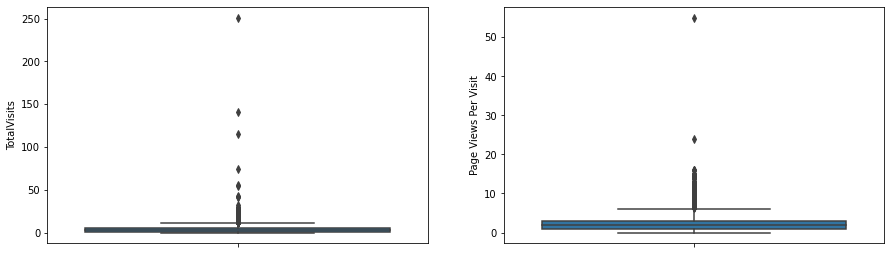

In [748]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.boxplot(y = 'TotalVisits', data = leadScore)
plt.subplot(4,2,2)
sns.boxplot(y = 'Page Views Per Visit', data = leadScore)
plt.show()

So, we can cap the values beyond 99% for both `TotalVisits` & `Page Views Per Visit`, thereby omitting the outliers and hence making the distribution more linear

In [749]:
cap_totalVisits = leadScore['TotalVisits'].quantile(0.99)
leadScore = leadScore[leadScore["TotalVisits"] < cap_totalVisits]

cap_pageViews = leadScore['Page Views Per Visit'].quantile(0.99)
leadScore = leadScore[leadScore['Page Views Per Visit'] < cap_pageViews]

leadScore.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000
mean,0.385092,3.087164,483.133016,2.226383
std,0.486644,2.801244,547.420675,1.823395
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,1.000000
50%,0.000000,3.000000,245.000000,2.000000
75%,1.000000,4.000000,929.000000,3.000000
90%,1.000000,7.000000,1378.000000,5.000000
95%,1.000000,8.000000,1558.000000,6.000000
99%,1.000000,13.000000,1839.720000,7.000000


Let's check the retention of data

In [750]:
retainedLead = round((len(leadScore)/9240)*100, 2)
retainedLead

97.72

So `97.72%` data is still retained

#### Now let's try to understand the data of each column and their effect on the conversion rate

#### `Converted`

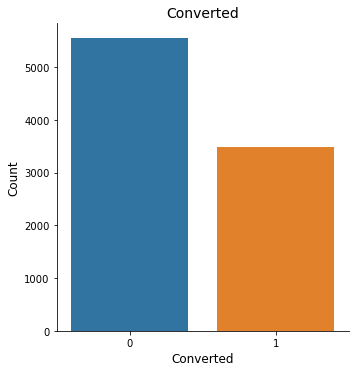

In [751]:
sns.catplot(data=leadScore, x='Converted', kind='count')
plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

We can infere from the above plot that conversion rate is nearly `39%`

#### `Analysis For Numeric Columns`

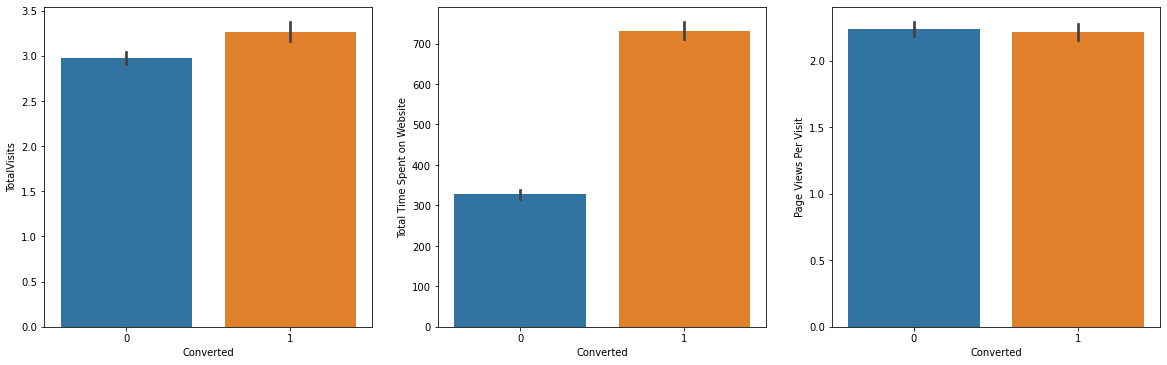

In [752]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.barplot(data=leadScore, x='Converted', y='TotalVisits')
plt.subplot(3,3,2)
sns.barplot(data=leadScore, x='Converted', y='Total Time Spent on Website')
plt.subplot(3,3,3)
sns.barplot(data=leadScore, x='Converted', y='Page Views Per Visit')
plt.show()

We can observe that the conversion rate for all numeric columns is pretty high.

### `Analysis for Categorical Columns`

#### `Lead Origin`

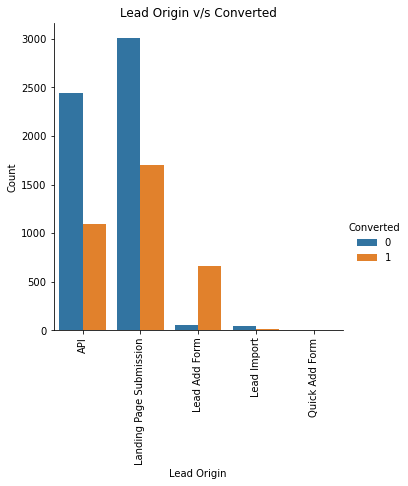

In [753]:
sns.catplot(data=leadScore, x='Lead Origin', hue='Converted', kind='count')

plt.title('Lead Origin v/s Converted', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Lead Origin', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.show()

We can immediately notice that the most numbers of conversions come from `Landing Page Submission`, followed by the `API`. 

#### `Lead Source`

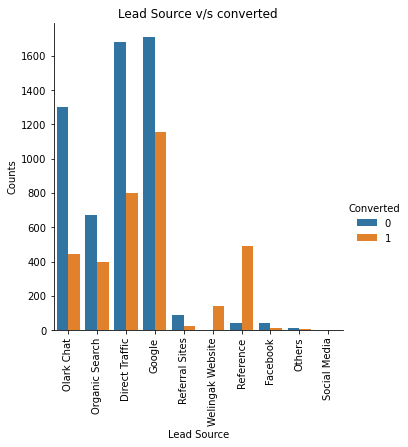

In [754]:
sns.catplot(data=leadScore, x='Lead Source', hue='Converted', kind='count')

plt.title('Lead Source v/s converted', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Lead Source', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

We can observe that the most numbers of conversions are coming from `Google`.

#### `Do Not Email`

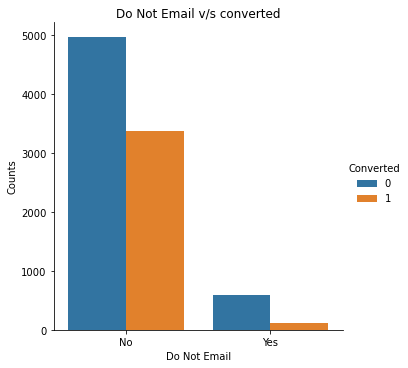

In [755]:
sns.catplot(data=leadScore, x='Do Not Email', hue='Converted', kind='count')

plt.title('Do Not Email v/s converted', fontsize=12)
plt.xlabel('Do Not Email', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

In the above plot, we can notice that the majority of conversion is happening when the emails were sent.

#### `Do Not Call`

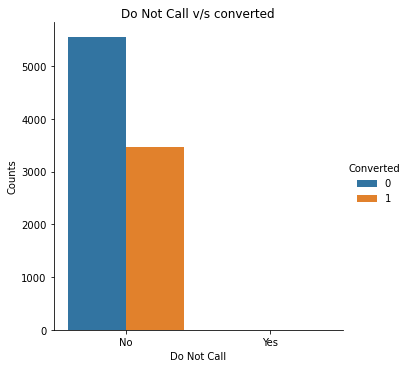

In [756]:
sns.catplot(data=leadScore, x='Do Not Call', hue='Converted', kind='count')

plt.title('Do Not Call v/s converted', fontsize=12)
plt.xlabel('Do Not Call', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

We cannot make any clear inferences as the data is highly skewed and it's safe to drop this column.

In [757]:
leadScore = leadScore.drop(['Do Not Call'], axis=1)

#### `Last Activity`

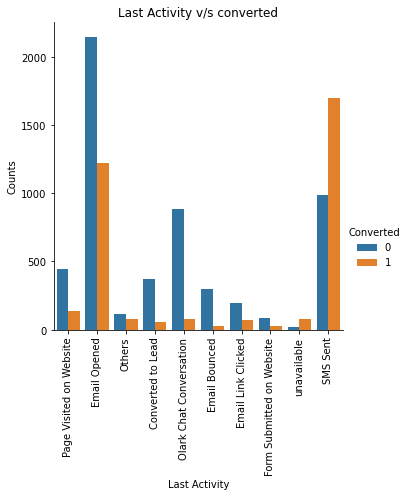

In [758]:
sns.catplot(data=leadScore, x='Last Activity', hue='Converted', kind='count')

plt.title('Last Activity v/s converted', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Last Activity', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

We can observe that the conversion rate for `SMS Sent` is the highest, followed by `Email Opened`.

We can also recall that this is a sales team generated data and we can safely drop this variable.

In [759]:
leadScore = leadScore.drop(['Last Activity'], axis=1)

#### `What is your current occupation`

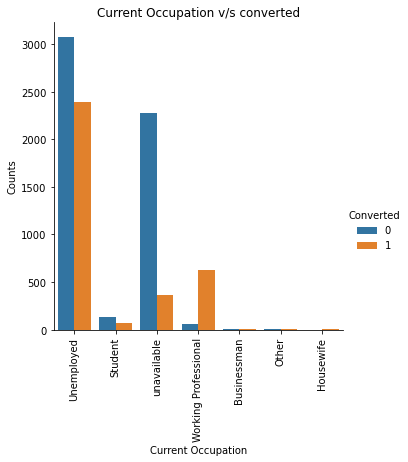

In [760]:
sns.catplot(data=leadScore, x='What is your current occupation', hue='Converted', kind='count')

plt.title('Current Occupation v/s converted', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Current Occupation', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

We can observe that the highest number of conversion rate comes from `Unemployed`, which is followed by `Working Professional`.

#### `Search`

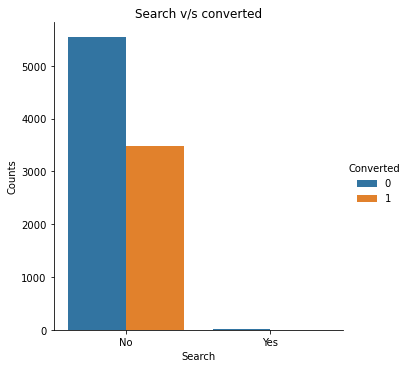

In [761]:
sns.catplot(data=leadScore, x='Search', hue='Converted', kind='count')

plt.title('Search v/s converted', fontsize=12)

plt.xlabel('Search', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

We cannot make any clear inferences in this column as well since the data is highy skewed and it's safe to drop this column.

In [762]:
leadScore = leadScore.drop(['Search'], axis=1)

#### `Newspaper Article`

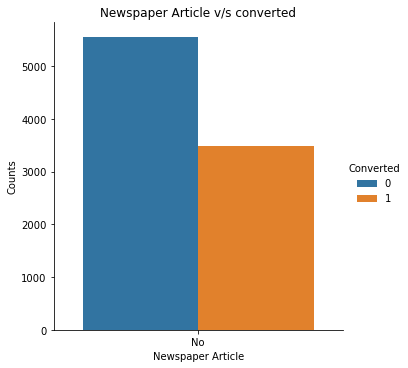

In [763]:
sns.catplot(data=leadScore, x='Newspaper Article', hue='Converted', kind='count')

plt.title('Newspaper Article v/s converted', fontsize=12)

plt.xlabel('Newspaper Article', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

We can notice that the conversion rates are fairly good but, there's only one value in all the rows. Hence it is safe to drop this `Newspaper Article` column

In [764]:
leadScore = leadScore.drop(['Newspaper Article'], axis=1)

#### `X Education Forums`

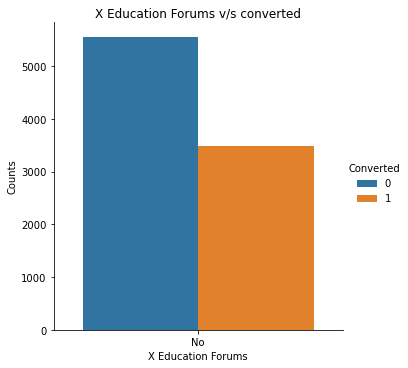

In [765]:
sns.catplot(data=leadScore, x='X Education Forums', hue='Converted', kind='count')

plt.title('X Education Forums v/s converted', fontsize=12)

plt.xlabel('X Education Forums', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

Again, the conversion rates for this column are high but there is only one value in all the rows. We can drop the `X Education Forums` column.

In [766]:
leadScore = leadScore.drop(['X Education Forums'], axis=1)

#### `Newspaper`

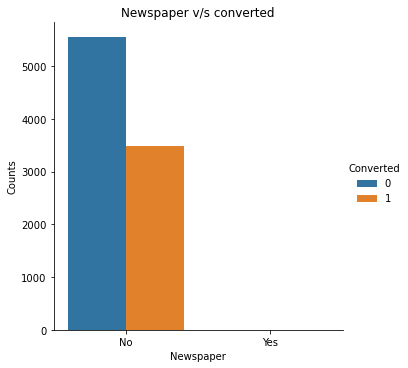

In [767]:
sns.catplot(data=leadScore, x='Newspaper', hue='Converted', kind='count')

plt.title('Newspaper v/s converted', fontsize=12)

plt.xlabel('Newspaper', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

We can obesrve that the data in the above plot is highly imbalance and it may hinder the accuracy of the model, hence we can drop the `Newspaper` column.

In [768]:
leadScore = leadScore.drop(['Newspaper'], axis=1)

#### `Digital Advertisement`

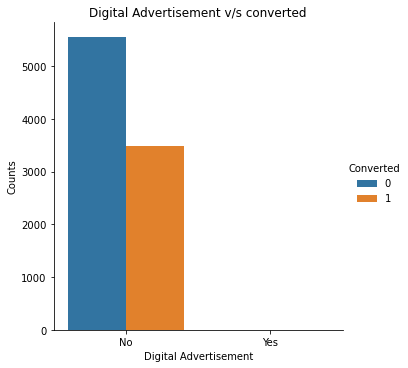

In [769]:
sns.catplot(data=leadScore, x='Digital Advertisement', hue='Converted', kind='count')

plt.title('Digital Advertisement v/s converted', fontsize=12)

plt.xlabel('Digital Advertisement', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

We can obesrve that the data in the above plot is highly imbalance and it may hinder the accuracy of the model, hence we can drop the `Digital Advertisement` column.

In [770]:
leadScore = leadScore.drop(['Digital Advertisement'], axis=1)

#### `Through Recommendations`

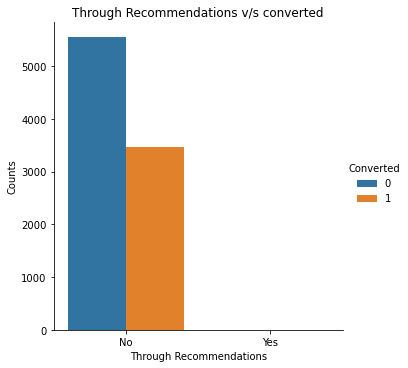

In [771]:
sns.catplot(data=leadScore, x='Through Recommendations', hue='Converted', kind='count')

plt.title('Through Recommendations v/s converted', fontsize=12)

plt.xlabel('Through Recommendations', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

We can obesrve that the data in the above plot is highly imbalance and it may hinder the accuracy of the model, hence we can drop the `Through Recommendations` column.

In [772]:
leadScore = leadScore.drop(['Through Recommendations'], axis=1)

#### `A free copy of Mastering The Interview`

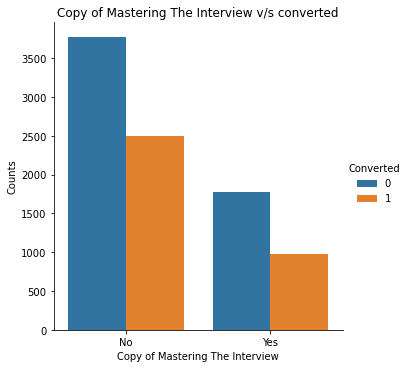

In [773]:
sns.catplot(data=leadScore, x='A free copy of Mastering The Interview', hue='Converted', kind='count')

plt.title('Copy of Mastering The Interview v/s converted', fontsize=12)

plt.xlabel('Copy of Mastering The Interview', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

We can observe that the conversion rates are higher for those leads who do not want `A free copy of Mastering The Interview` and also, we can recall that this is a redundant variable to we drop it.

In [774]:
leadScore = leadScore.drop(['A free copy of Mastering The Interview'], axis=1)

#### `Last Notable Activity`

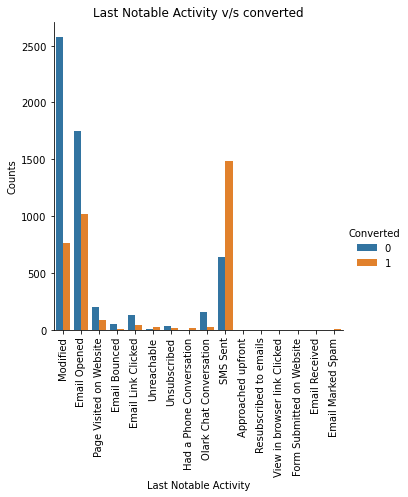

In [775]:
sns.catplot(data=leadScore, x='Last Notable Activity', hue='Converted', kind='count')

plt.title('Last Notable Activity v/s converted', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Last Notable Activity', fontsize=10)
plt.ylabel('Counts', fontsize=10)

plt.show()

We can observe that the conversion rates of `SMS Sent` is the highest, followed by `Email Opened`.

We can also drop this column because this is a sales generated data and we should not consider this for further analysis and model building.

In [776]:
leadScore = leadScore.drop(['Last Notable Activity'], axis=1)

In [777]:
leadScore.shape

(9029, 8)

# Step 4: Data Preparation

#### `Converting some binary variables (Yes/No) to 0/1`

In [778]:
varList = ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leadScore[varList] = leadScore[varList].apply(binary_map)

In [779]:
leadScore.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


#### `For categorical variables with multiple levels, create dummy features`

In [780]:
# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leadScore['Lead Origin'], prefix='Lead Origin')
#Adding the results to the master dataframe
leadScore = pd.concat([leadScore, lo1], axis = 1)

# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(leadScore['Lead Source'], prefix='Lead Source')
# Adding the results to the master dataframe
leadScore = pd.concat([leadScore,ls], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
co = pd.get_dummies(leadScore['What is your current occupation'], prefix='Current Occupation')
# Adding the results to the master dataframe
leadScore = pd.concat([leadScore,co1], axis=1)


leadScore.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Origin_API,Lead Origin_Landing Page Submission,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Current Occupation_unavailable
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,1,0,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,1,0,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,0,1,...,0,0,0,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,0,1,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,0,1,...,0,0,0,0,0,0,0,1,0,0


#### `Removing unnecessary columns`

In [781]:
leadScore = leadScore.drop(['Lead Origin', 'Lead Source', 'What is your current occupation'], axis=1)

In [782]:
leadScore.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Current Occupation_unavailable
0,0,0,0.0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [783]:
leadScore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Do Not Email                             9029 non-null   int64  
 1   Converted                                9029 non-null   int64  
 2   TotalVisits                              9029 non-null   float64
 3   Total Time Spent on Website              9029 non-null   int64  
 4   Page Views Per Visit                     9029 non-null   float64
 5   Lead Origin_API                          9029 non-null   uint8  
 6   Lead Origin_Landing Page Submission      9029 non-null   uint8  
 7   Lead Origin_Lead Add Form                9029 non-null   uint8  
 8   Lead Origin_Lead Import                  9029 non-null   uint8  
 9   Lead Source_Direct Traffic               9029 non-null   uint8  
 10  Lead Source_Facebook                     9029 no

In [784]:
leadMissing = round(leadScore.isnull().sum()/len(leadScore.index)*100, 2)
leadMissing

Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                0.0
Total Time Spent on Website                0.0
Page Views Per Visit                       0.0
Lead Origin_API                            0.0
Lead Origin_Landing Page Submission        0.0
Lead Origin_Lead Add Form                  0.0
Lead Origin_Lead Import                    0.0
Lead Source_Direct Traffic                 0.0
Lead Source_Facebook                       0.0
Lead Source_Google                         0.0
Lead Source_Olark Chat                     0.0
Lead Source_Organic Search                 0.0
Lead Source_Others                         0.0
Lead Source_Reference                      0.0
Lead Source_Referral Sites                 0.0
Lead Source_Social Media                   0.0
Lead Source_Welingak Website               0.0
Current Occupation_Housewife               0.0
Current Occupation_Other                   0.0
Current Occup

In [785]:
leadScore.shape

(9029, 25)

# Step 5: Test-Train Split

In [786]:
from sklearn.model_selection import train_test_split

In [787]:
# Putting feature variable to X
X = leadScore.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Current Occupation_unavailable
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,2.0,1532,2.0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [788]:
# Putting response variable to y
y = leadScore['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [789]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6: Feature Scaling

Notice that we have so many columns with 0/1 values and less number of continuous variables. This is a favorable environment for `MinMaxScaler()` to do the feature scaling instead of `StandardScaler()`.

In [790]:
from sklearn.preprocessing import MinMaxScaler

In [791]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Current Occupation_unavailable
5493,0,0.1250,0.042254,0.250,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8064,0,0.1875,0.041373,0.375,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4716,1,0.1875,0.099032,0.375,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9117,0,0.0000,0.000000,0.000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2402,0,0.3750,0.381162,0.250,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [792]:
### Checking the Conversion rate

leadConverted = round((sum(leadScore['Converted'])/len(leadScore['Converted'].index))*100, 2)
leadConverted

38.51

We have a conversion rate of `38.51%`.

# Step 7: Looking at Correlations

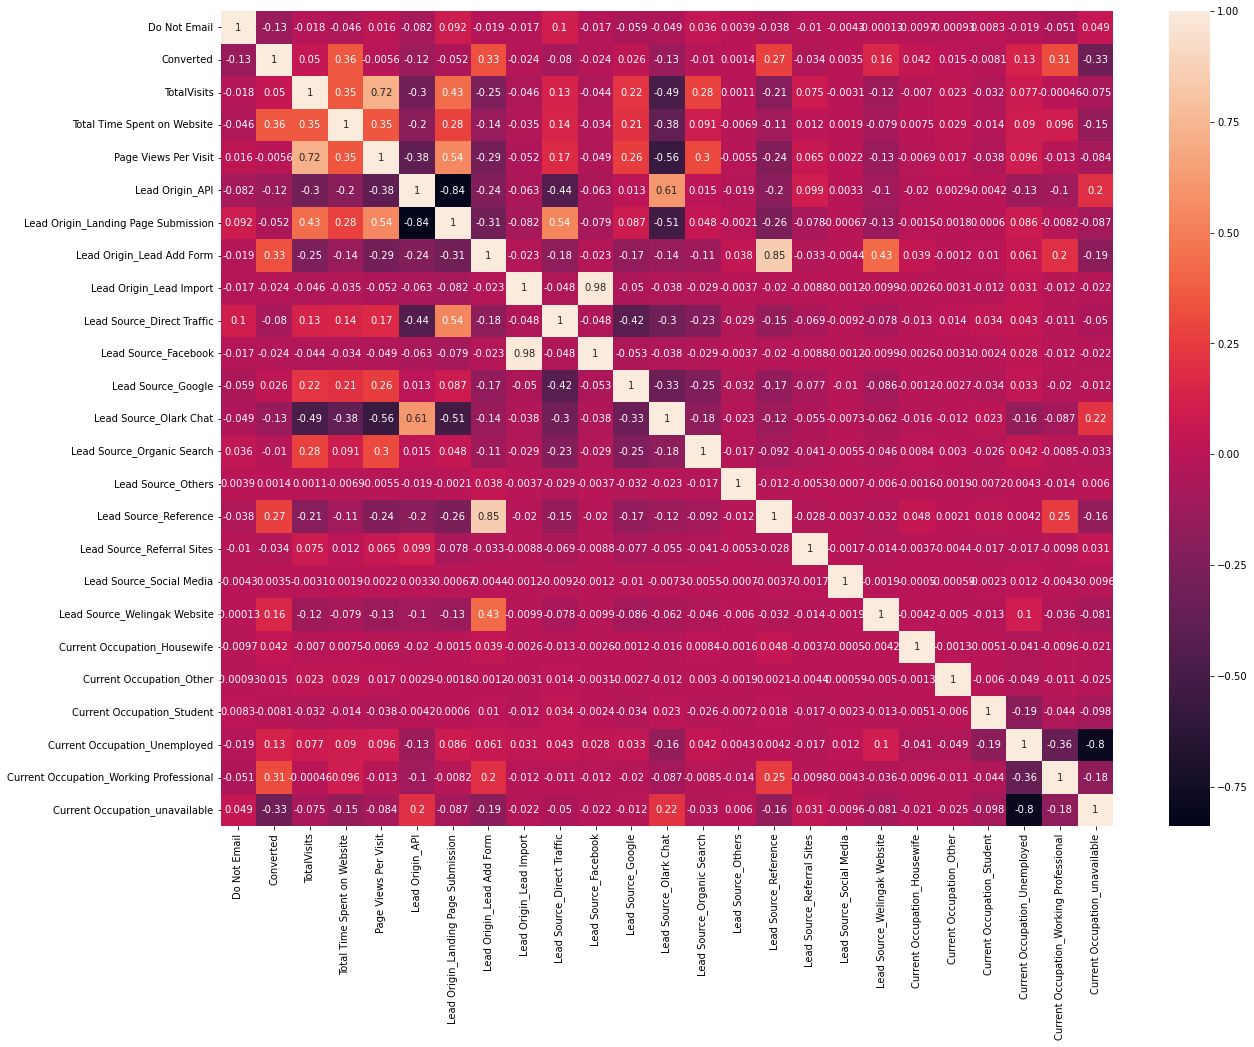

In [793]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leadScore.corr(),annot = True)
plt.show()

If we look closely at the heatmap, we can observe that no variables are highly correlated except `Lead Origin_API` and `Lead Origin_Landing Page Submission`, so its safe to drop this column.

In [794]:
X_test = X_test.drop(['Lead Origin_API', 'Lead Origin_Landing Page Submission'], 1)
X_train = X_train.drop(['Lead Origin_API', 'Lead Origin_Landing Page Submission'], 1)

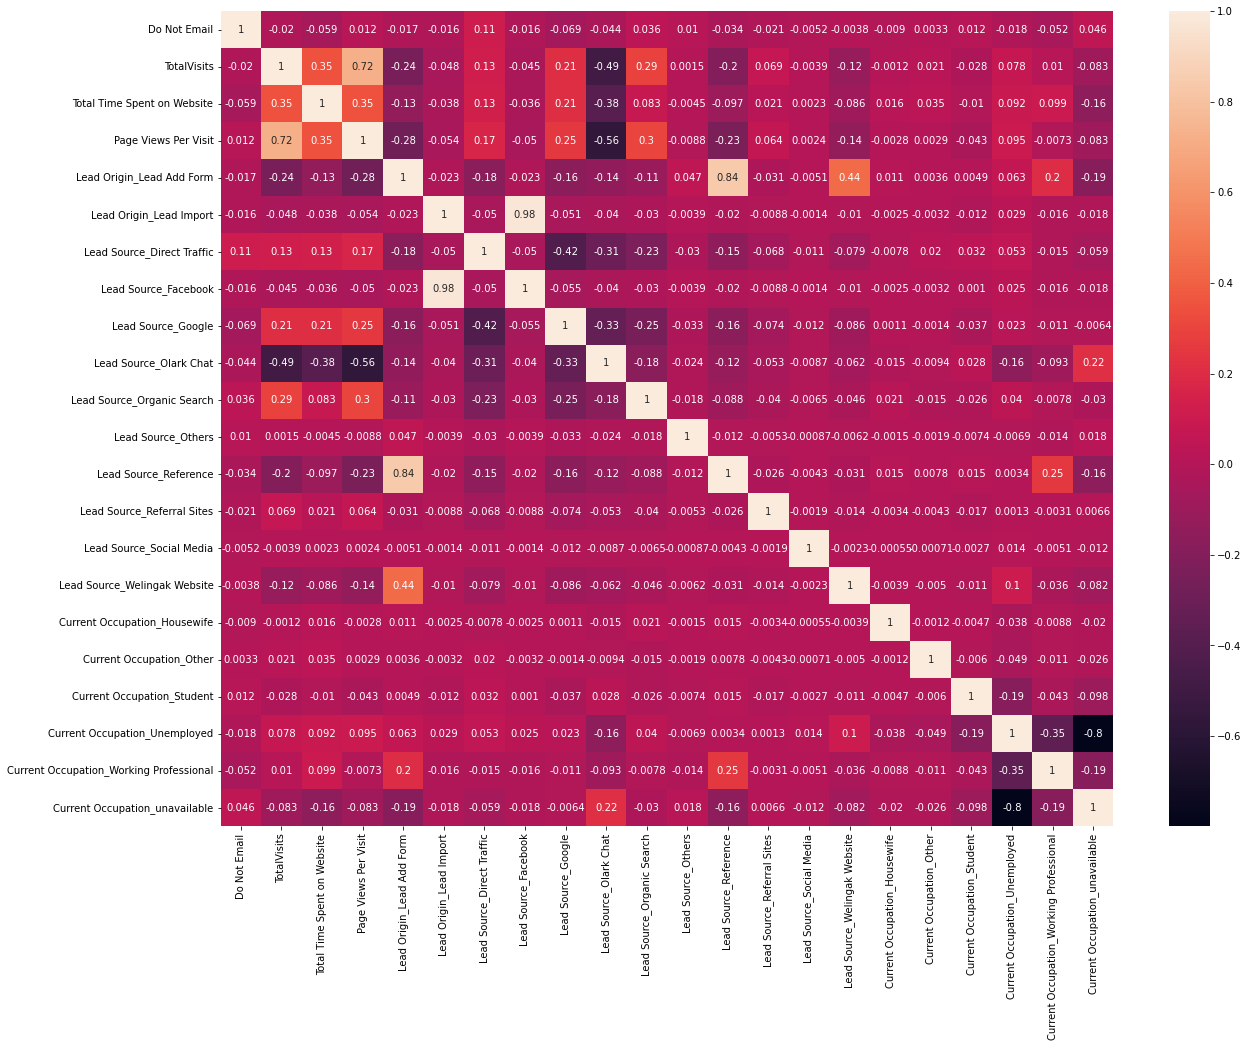

In [795]:
### Checking the correlation heatmap again

plt.figure(figsize=(20,15)) # size of the heatmap
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Step 8: Model Building

In [796]:
import statsmodels.api as sm

In [797]:
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2838.8
Date:                Tue, 21 Mar 2023   Deviance:                       5677.6
Time:                        01:47:39   Pearson chi2:                 7.31e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3503
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.0818      1.011     -2.060      0.039      -4.063      -0.101
Do Not Email                               -1.1109      0.158     -7.016      0.000      -1.421      -0.801
TotalVisits                                 1.1488      0.271      4.242      0.000       0.618       1.680
Total Time Spent on Website                 4.5183      0.162     27.887      0.000       4.201       4.836
Page Views Per Visit                       -0.1865      0.232     -0.805      0.421      -0.641       0.268
Lead Origin_Lead Add Form                   3.2384      0.498      6.508      0.000       2.263       4.214
Lead Origin_Lead Import                     0.3443      1.796      0.192      0.848      -3.176       3.864
Lead Source_Direct Traffic                 -0.8418      0.280     -3.002      0.003      -1.391      -0.292
Lead Source_Facebook                       -0.8988      1.646     -0.546      0.585      -4.125       2.327
Lead Source_Google                         -0.5055      0.276     -1.829      0.067      -1.047       0.036
Lead Source_Olark Chat                      0.5337      0.290      1.838      0.066      -0.035       1.103
Lead Source_Organic Search                 -0.7649      0.290     -2.642      0.008      -1.332      -0.197
Lead Source_Others                         -0.1269      0.693     -0.183      0.855      -1.486       1.232
Lead Source_Reference                      -0.2147      0.498     -0.431      0.667      -1.191       0.762
Lead Source_Referral Sites                 -1.2090      0.404     -2.996      0.003      -2.000      -0.418
Lead Source_Social Media                    0.0233      1.397      0.017      0.987      -2.716       2.762
Lead Source_Welingak Website                1.9229      0.797      2.412      0.016       0.360       3.485
Current Occupation_Housewife               23.5389   1.71e+04      0.001      0.999   -3.34e+04    3.35e+04
Current Occupation_Other                    0.2320      1.272      0.182      0.855      -2.261       2.725
Current Occupation_Student                  0.6096      1.091      0.559      0.576      -1.530       2.749
Current Occupation_Unemployed               0.8375      1.073      0.780      0.435      -1.266       2.941
Current Occupation_Working Professional     3.2094      1.086      2.955      0.003       1.081       5.338
Current Occupation_unavailable             -0.4946      1.075     -0.460      0.646      -2.602       1.613
===========================================================================================================
"""

# Step 9: Feature Selection using RFE

In [798]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [799]:
from sklearn.feature_selection import RFE
rfe = RFE(logReg, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [800]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True])

In [801]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Current Occupation_Housewife', True, 1),
 ('Current Occupation_Other', True, 1),
 ('Current Occupation_Student', False, 2),
 ('Current Occupation_Unemployed', False, 5),
 ('Current Occupation_Working Professional', True, 1),
 ('Current Occupation_unavailable', True, 1)]

In [802]:
col = X_train.columns[rfe.support_]

In [803]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Lead Import', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Current Occupation_Student', 'Current Occupation_Unemployed'],
      dtype='object')

##### Assessing the model with StatsModels

##### Model 1

In [804]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.1
Date:                Tue, 21 Mar 2023   Deviance:                       5680.2
Time:                        01:47:39   Pearson chi2:                 7.33e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3500
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.4680      0.441     -3.329      0.001      -2.332      -0.604
Do Not Email                               -1.1093      0.158     -7.025      0.000      -1.419      -0.800
TotalVisits                                 1.0334      0.234      4.423      0.000       0.575       1.491
Total Time Spent on Website                 4.5136      0.162     27.877      0.000       4.196       4.831
Lead Origin_Lead Add Form                   3.2371      0.426      7.595      0.000       2.402       4.072
Lead Source_Direct Traffic                 -0.6649      0.440     -1.511      0.131      -1.527       0.198
Lead Source_Facebook                       -0.3695      0.610     -0.606      0.545      -1.565       0.826
Lead Source_Google                         -0.3275      0.434     -0.755      0.450      -1.178       0.523
Lead Source_Olark Chat                      0.7422      0.446      1.665      0.096      -0.131       1.616
Lead Source_Organic Search                 -0.5931      0.446     -1.330      0.184      -1.467       0.281
Lead Source_Referral Sites                 -1.0302      0.544     -1.895      0.058      -2.096       0.035
Lead Source_Welingak Website                2.1443      0.743      2.886      0.004       0.688       3.601
Current Occupation_Housewife               22.7278    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
Current Occupation_Other                   -0.5860      0.686     -0.854      0.393      -1.931       0.759
Current Occupation_Working Professional     2.3792      0.174     13.651      0.000       2.038       2.721
Current Occupation_unavailable             -1.3206      0.083    -15.883      0.000      -1.484      -1.158
===========================================================================================================
"""

The `p-value` of `Current Occupation_Housewife` is high so we can drop it.

In [805]:
col = col.drop('Current Occupation_Housewife', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Current Occupation_Other',
       'Current Occupation_Working Professional',
       'Current Occupation_unavailable'],
      dtype='object')

##### Model 2

In [806]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.3
Date:                Tue, 21 Mar 2023   Deviance:                       5688.5
Time:                        01:47:39   Pearson chi2:                 7.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3492
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.4591      0.441     -3.308      0.001      -2.324      -0.595
Do Not Email                               -1.1130      0.158     -7.049      0.000      -1.422      -0.803
TotalVisits                                 1.0209      0.234      4.372      0.000       0.563       1.479
Total Time Spent on Website                 4.5127      0.162     27.893      0.000       4.196       4.830
Lead Origin_Lead Add Form                   3.2345      0.426      7.587      0.000       2.399       4.070
Lead Source_Direct Traffic                 -0.6673      0.440     -1.516      0.129      -1.530       0.195
Lead Source_Facebook                       -0.3762      0.610     -0.617      0.537      -1.572       0.820
Lead Source_Google                         -0.3298      0.434     -0.760      0.447      -1.181       0.521
Lead Source_Olark Chat                      0.7348      0.446      1.649      0.099      -0.139       1.608
Lead Source_Organic Search                 -0.5869      0.446     -1.316      0.188      -1.461       0.287
Lead Source_Referral Sites                 -1.0342      0.544     -1.902      0.057      -2.100       0.032
Lead Source_Welingak Website                2.1388      0.743      2.878      0.004       0.682       3.595
Current Occupation_Other                   -0.5876      0.686     -0.856      0.392      -1.933       0.758
Current Occupation_Working Professional     2.3752      0.174     13.629      0.000       2.034       2.717
Current Occupation_unavailable             -1.3238      0.083    -15.924      0.000      -1.487      -1.161
===========================================================================================================
"""

The `p-value` of `Lead Source_Facebook` is very high, so we can drop this variable. 

In [807]:
col = col.drop('Lead Source_Facebook', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Current Occupation_Other',
       'Current Occupation_Working Professional',
       'Current Occupation_unavailable'],
      dtype='object')

##### Model 3

In [808]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.5
Date:                Tue, 21 Mar 2023   Deviance:                       5688.9
Time:                        01:47:40   Pearson chi2:                 7.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3491
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.6599      0.307     -5.400      0.000      -2.262      -1.057
Do Not Email                               -1.1181      0.158     -7.076      0.000      -1.428      -0.808
TotalVisits                                 1.0271      0.233      4.402      0.000       0.570       1.484
Total Time Spent on Website                 4.5166      0.162     27.928      0.000       4.200       4.834
Lead Origin_Lead Add Form                   3.4098      0.329     10.376      0.000       2.766       4.054
Lead Source_Direct Traffic                 -0.4691      0.311     -1.509      0.131      -1.078       0.140
Lead Source_Google                         -0.1340      0.306     -0.437      0.662      -0.734       0.466
Lead Source_Olark Chat                      0.9351      0.315      2.969      0.003       0.318       1.552
Lead Source_Organic Search                 -0.3893      0.320     -1.216      0.224      -1.017       0.238
Lead Source_Referral Sites                 -0.8368      0.447     -1.874      0.061      -1.712       0.038
Lead Source_Welingak Website                2.1652      0.742      2.920      0.004       0.712       3.619
Current Occupation_Other                   -0.5860      0.686     -0.854      0.393      -1.931       0.759
Current Occupation_Working Professional     2.3764      0.174     13.640      0.000       2.035       2.718
Current Occupation_unavailable             -1.3226      0.083    -15.913      0.000      -1.486      -1.160
===========================================================================================================
"""

The `p-value` of `Lead Source_Google` is high, so we can drop this variable.

In [809]:
col = col.drop('Lead Source_Google', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Current Occupation_Other', 'Current Occupation_Working Professional',
       'Current Occupation_unavailable'],
      dtype='object')

##### Model 4

In [810]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.6
Date:                Tue, 21 Mar 2023   Deviance:                       5689.1
Time:                        01:47:40   Pearson chi2:                 7.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3491
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.7879      0.096    -18.713      0.000      -1.975      -1.601
Do Not Email                               -1.1219      0.158     -7.102      0.000      -1.432      -0.812
TotalVisits                                 1.0205      0.233      4.382      0.000       0.564       1.477
Total Time Spent on Website                 4.5131      0.162     27.944      0.000       4.197       4.830
Lead Origin_Lead Add Form                   3.5220      0.207     17.004      0.000       3.116       3.928
Lead Source_Direct Traffic                 -0.3382      0.085     -4.000      0.000      -0.504      -0.172
Lead Source_Olark Chat                      1.0634      0.116      9.188      0.000       0.837       1.290
Lead Source_Organic Search                 -0.2578      0.111     -2.327      0.020      -0.475      -0.041
Lead Source_Referral Sites                 -0.7057      0.331     -2.132      0.033      -1.354      -0.057
Lead Source_Welingak Website                2.1818      0.741      2.946      0.003       0.730       3.633
Current Occupation_Other                   -0.5845      0.686     -0.852      0.394      -1.929       0.760
Current Occupation_Working Professional     2.3767      0.174     13.642      0.000       2.035       2.718
Current Occupation_unavailable             -1.3226      0.083    -15.913      0.000      -1.486      -1.160
===========================================================================================================
"""

The `p-value` of `Current Occupation_Other` is high, so we can drop this variable.

In [811]:
col = col.drop('Current Occupation_Other', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Current Occupation_Working Professional',
       'Current Occupation_unavailable'],
      dtype='object')

##### Model 5

In [812]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.9
Date:                Tue, 21 Mar 2023   Deviance:                       5689.8
Time:                        01:47:40   Pearson chi2:                 7.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3490
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.7863      0.096    -18.703      0.000      -1.974      -1.599
Do Not Email                               -1.1239      0.158     -7.110      0.000      -1.434      -0.814
TotalVisits                                 1.0153      0.233      4.362      0.000       0.559       1.472
Total Time Spent on Website                 4.5073      0.161     27.945      0.000       4.191       4.823
Lead Origin_Lead Add Form                   3.5186      0.207     16.989      0.000       3.113       3.925
Lead Source_Direct Traffic                 -0.3396      0.085     -4.018      0.000      -0.505      -0.174
Lead Source_Olark Chat                      1.0609      0.116      9.172      0.000       0.834       1.288
Lead Source_Organic Search                 -0.2561      0.111     -2.313      0.021      -0.473      -0.039
Lead Source_Referral Sites                 -0.7041      0.331     -2.128      0.033      -1.353      -0.056
Lead Source_Welingak Website                2.1841      0.741      2.949      0.003       0.733       3.635
Current Occupation_Working Professional     2.3782      0.174     13.653      0.000       2.037       2.720
Current Occupation_unavailable             -1.3208      0.083    -15.899      0.000      -1.484      -1.158
===========================================================================================================
"""

The `p-value` of `Lead Source_Referral Sites` is high, so we can remove this variable.

In [813]:
col = col.drop('Lead Source_Referral Sites', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Welingak Website',
       'Current Occupation_Working Professional',
       'Current Occupation_unavailable'],
      dtype='object')

##### Model 6

In [814]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.3
Date:                Tue, 21 Mar 2023   Deviance:                       5694.7
Time:                        01:47:40   Pearson chi2:                 7.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3485
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.8049      0.095    -18.962      0.000      -1.991      -1.618
Do Not Email                               -1.1193      0.158     -7.084      0.000      -1.429      -0.810
TotalVisits                                 0.9954      0.232      4.284      0.000       0.540       1.451
Total Time Spent on Website                 4.5111      0.161     27.976      0.000       4.195       4.827
Lead Origin_Lead Add Form                   3.5367      0.207     17.090      0.000       3.131       3.942
Lead Source_Direct Traffic                 -0.3179      0.084     -3.785      0.000      -0.483      -0.153
Lead Source_Olark Chat                      1.0796      0.115      9.354      0.000       0.853       1.306
Lead Source_Organic Search                 -0.2323      0.110     -2.108      0.035      -0.448      -0.016
Lead Source_Welingak Website                2.1838      0.740      2.949      0.003       0.733       3.635
Current Occupation_Working Professional     2.3803      0.174     13.661      0.000       2.039       2.722
Current Occupation_unavailable             -1.3206      0.083    -15.902      0.000      -1.483      -1.158
===========================================================================================================
"""

The `p-value` of `Lead Source_Organic Search` is high, so we can drop it.

In [815]:
col = col.drop('Lead Source_Organic Search', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Current Occupation_Working Professional',
       'Current Occupation_unavailable'],
      dtype='object')

##### Model 7

In [816]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.6
Date:                Tue, 21 Mar 2023   Deviance:                       5699.2
Time:                        01:47:40   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3481
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.8449      0.094    -19.723      0.000      -2.028      -1.662
Do Not Email                               -1.1349      0.158     -7.203      0.000      -1.444      -0.826
TotalVisits                                 0.9084      0.229      3.972      0.000       0.460       1.357
Total Time Spent on Website                 4.5220      0.161     28.066      0.000       4.206       4.838
Lead Origin_Lead Add Form                   3.5797      0.206     17.370      0.000       3.176       3.984
Lead Source_Direct Traffic                 -0.2601      0.080     -3.271      0.001      -0.416      -0.104
Lead Source_Olark Chat                      1.1205      0.114      9.830      0.000       0.897       1.344
Lead Source_Welingak Website                2.1843      0.741      2.950      0.003       0.733       3.636
Current Occupation_Working Professional     2.3810      0.174     13.670      0.000       2.040       2.722
Current Occupation_unavailable             -1.3174      0.083    -15.862      0.000      -1.480      -1.155
===========================================================================================================
"""

#### This seems to be a stable model with significantly low `p-values`. We can go ahead with this model for further analysis.

##### Checking VIF

In [817]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.07
2,Total Time Spent on Website,1.92
8,Current Occupation_unavailable,1.44
3,Lead Origin_Lead Add Form,1.39
4,Lead Source_Direct Traffic,1.38
6,Lead Source_Welingak Website,1.29
5,Lead Source_Olark Chat,1.23
7,Current Occupation_Working Professional,1.18
0,Do Not Email,1.09


#### All variables have a stable `VIF` value, hence we can proceed with making predictions.

##### Predicting a Train Model

In [818]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.141806
8064    0.148353
4716    0.024625
9117    0.326431
2402    0.554626
1796    0.114883
1120    0.114883
253     0.066075
1491    0.141085
2004    0.146222
dtype: float64

In [819]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14180606, 0.14835301, 0.02462545, 0.32643068, 0.55462572,
       0.114883  , 0.114883  , 0.06607548, 0.14108517, 0.14622211])

In [820]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.141806,5493
1,0,0.148353,8064
2,0,0.024625,4716
3,0,0.326431,9117
4,1,0.554626,2402


In [821]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.141806,5493,0
1,0,0.148353,8064,0
2,0,0.024625,4716,0
3,0,0.326431,9117,0
4,1,0.554626,2402,1


##### Let's take a look at the confusion matrix

In [822]:
from sklearn import metrics

In [823]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3495,  414],
       [ 841, 1570]], dtype=int64)

In [824]:
# Actual/Predicted     not_churn    churn
        # not_churn        3495      414
        # churn            841      1570  

In [825]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8014240506329114


#### `Metrics Beyond Simply Accuracy`

In [826]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [827]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6511820821236002

In [828]:
# Let us calculate specificity
TN / float(TN+FP)

0.8940905602455871

In [829]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.10590943975441289


In [830]:
# positive predictive value 
print (TP / float(TP+FP))

0.7913306451612904


In [831]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8060424354243543


# Step 10: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [832]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [833]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

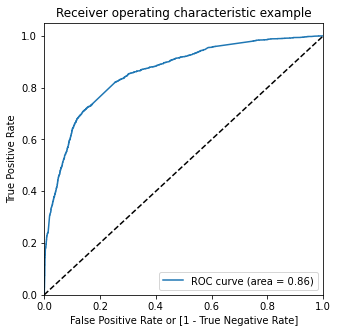

In [834]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The area under `ROC Curve` is acceptable for us to proceed further with evaluation.

# Step 11: Finding Optimal Cut-Off Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [835]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.141806,5493,0,1,1,0,0,0,0,0,0,0,0
1,0,0.148353,8064,0,1,1,0,0,0,0,0,0,0,0
2,0,0.024625,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.326431,9117,0,1,1,1,1,0,0,0,0,0,0
4,1,0.554626,2402,1,1,1,1,1,1,1,0,0,0,0


In [836]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.522152  0.983409  0.237657
0.2   0.2  0.690823  0.899212  0.562292
0.3   0.3  0.768354  0.829946  0.730366
0.4   0.4  0.802532  0.705102  0.862625
0.5   0.5  0.801424  0.651182  0.894091
0.6   0.6  0.784019  0.572791  0.914300
0.7   0.7  0.764873  0.476151  0.942952
0.8   0.8  0.736076  0.357528  0.969557
0.9   0.9  0.691772  0.204479  0.992325


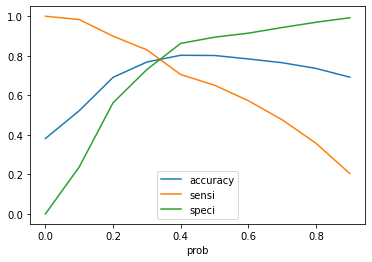

In [837]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [838]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.141806,5493,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.148353,8064,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.024625,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.326431,9117,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.554626,2402,1,1,1,1,1,1,1,0,0,0,0,1


In [839]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead_Score
0,0,0.141806,5493,0,14
1,0,0.148353,8064,0,15
2,0,0.024625,4716,0,2
3,0,0.326431,9117,1,33
4,1,0.554626,2402,1,55


In [840]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    2001
0     410
Name: final_predicted, dtype: int64

In [841]:
# check the precentage of final_predicted conversions

2001/float(2001+410)

0.8299460804645376

#### We can see that the final prediction on conversions is ~83% and hence it meets all the expectations of X Education's CEO. We can say this is a good model.

In [842]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7683544303797468

In [843]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2855, 1054],
       [ 410, 2001]], dtype=int64)

In [844]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [845]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8299460804645376

In [846]:
# Let us calculate specificity
TN / float(TN+FP)

0.7303658224609875

In [847]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.26963417753901253


In [848]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6549918166939444


In [849]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8744257274119449


#### Insights:

The models seems to have been performing well. Area under the ROc Curve is at `0.86`, which is significant and acceptable.
Following are the evaluations on the Train Data:
- Accuracy: `76.83%`
- Sensitivity: `~83%`
- Specificity: `73.03%`

### Precision and Recall

In [850]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[2855, 1054],
       [ 410, 2001]], dtype=int64)

In [851]:
from sklearn.metrics import precision_score, recall_score

In [852]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6549918166939444

In [853]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8299460804645376

### Precision and Recall Trade-Off

In [854]:
from sklearn.metrics import precision_recall_curve

In [855]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: final_predicted, Length: 6320, dtype: int64)

In [856]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

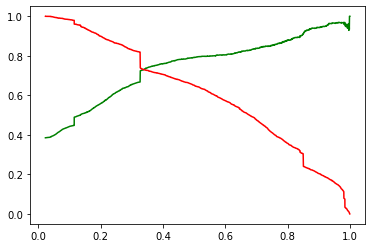

In [857]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 12: Making Predictions on the Test set

In [858]:
#scaling test set

numCols = X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[numCols] = scaler.fit_transform(X_test[numCols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Current Occupation_unavailable
4664,0.0,0.0000,0.000000,0.00000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5394,0.0,0.2500,0.073974,0.16625,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1595,0.0,0.2500,0.528191,0.50000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2111,0.0,0.4375,0.235453,0.87500,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9182,0.0,0.0000,0.000000,0.00000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [859]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Welingak Website,Current Occupation_Working Professional,Current Occupation_unavailable
4664,0.0,0.0000,0.000000,0,0,1,0,0,0
5394,0.0,0.2500,0.073974,0,0,1,0,0,1
1595,0.0,0.2500,0.528191,0,0,0,0,1,0
2111,0.0,0.4375,0.235453,0,1,0,0,0,1
9182,0.0,0.0000,0.000000,0,0,1,0,0,0


In [860]:
X_test_sm = sm.add_constant(X_test)

##### `Making Predictions on the Test set`

In [861]:
y_test_pred = res.predict(X_test_sm)

In [862]:
y_test_pred[:10]

4664    0.326431
5394    0.185396
1595    0.958975
2111    0.123435
9182    0.326431
1055    0.654404
541     0.095772
446     0.983949
3728    0.048742
4249    0.020778
dtype: float64

In [863]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [864]:
# Let's see the head
y_pred_1.head()

,0
4664,0.326431
5394,0.185396
1595,0.958975
2111,0.123435
9182,0.326431


In [865]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [866]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [867]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [868]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [869]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4664,0.326431
1,0,5394,0.185396
2,1,1595,0.958975
3,0,2111,0.123435
4,0,9182,0.326431


In [870]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [871]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [872]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4664,0,0.326431
1,5394,0,0.185396
2,1595,1,0.958975
3,2111,0,0.123435
4,9182,0,0.326431


In [873]:
# Getting the Lead Score for the Test set
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,4664,0,0.326431,33
1,5394,0,0.185396,19
2,1595,1,0.958975,96
3,2111,0,0.123435,12
4,9182,0,0.326431,33


In [874]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [875]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_predicted
0,4664,0,0.326431,33,1
1,5394,0,0.185396,19,0
2,1595,1,0.958975,96,1
3,2111,0,0.123435,12,0
4,9182,0,0.326431,33,1


In [876]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    909
0    157
Name: final_predicted, dtype: int64

In [877]:
# check the precentage of final_predicted conversions on test data

909/float(909+157)

0.8527204502814258

#### We can see that the final prediction on conversions is has a rate of `85.3%`.

In [878]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7770394979697305

In [879]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1196,  447],
       [ 157,  909]], dtype=int64)

In [880]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [881]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8527204502814258

In [882]:
# Let us calculate specificity
TN / float(TN+FP)

0.7279367011564212

#### Insights:

Following are the insights we drew from the predictions on the Test set:
- Accuracy: `77.7%`
- Sensitivity: `85.27%`
- specificity: `72.8%`

### Conclusion:

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut-off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 78%, 85% and 73% which are approximately closer to the respective values calculated using trained set.
- Thus, overall this model seems to be good.

#### Crucial features that lead to a higher conversion rate

- Lead Origin_Lead Add Form
- Total Time Spent on Website 
- What is your Current Occupation_Working Professional